## Цели и задачи

### Задача
Необходимо выяснить какой из двух тарифов приносит больше денег.
Данные предоставить коммерческому отделу для корректировки рекламного бюджета.

### План работ
1. Изучить полученные данные.
2. Подготовить данные для дальнейшего анализа.
3. Проанализировать поведение клиентов по представленной выборке.
4. Проверить гипотезы.
5. Сделать вывод и подготовить результаты исследования.

### Вводные
**Описание тарифов**   

***Тариф «Смарт»***   
Ежемесячная плата: 550 рублей   
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика   
Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей   

***Тариф «Ультра»***   
Ежемесячная плата: 1950 рублей   
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика   
Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей   
***
**Гипотезы для проверки**   
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных

In [1]:
# Сначала загружаю необходимые библиотеки и модули
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial

In [2]:
# Загружаю датасеты
df_calls = pd.read_csv('calls.csv') # Звонки
df_internet = pd.read_csv('internet.csv') # Интернет
df_messages = pd.read_csv('messages.csv') # Сообщения
df_tariffs = pd.read_csv('tariffs.csv') # Тарифы
df_users = pd.read_csv('users.csv') # Пользователи

In [3]:
# Веведу основную информацию о датасетах
for df in [df_calls, df_internet, df_messages, df_tariffs, df_users]:
    display(df.info())
    display(df.head(10))
    print('*'*60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


************************************************************


Отлично, что нет пропусков данных. Из того, что можно поправить - тип данных, а точнее везде изменить ```object``` на ```datetime```.

## Подготовка данных

### Проверка на дубли.

In [4]:
for df in [df_calls, df_internet, df_messages, df_tariffs, df_users]: # Проверю циклом наличие явных дублей
    print('Явных дублей:', df.duplicated().sum())
    print('*'*20)

Явных дублей: 0
********************
Явных дублей: 0
********************
Явных дублей: 0
********************
Явных дублей: 0
********************
Явных дублей: 0
********************


### Детали датафреймов

Посмотрю поближе на каждый из датафреймов.   
**df_calls** - данные о звонках   
**df_internet** - данные о использование интернета   
**df_messages** - данные о сообщениях   
**df_tariffs** - данные о тарифных планах   
**df_users** - данные о пользователях   

In [5]:
for column in df_calls.columns: # Посмотрю описание данных в столбцах таблицы
    display(df_calls[column].describe())
    display(df_calls[column].value_counts())

count     202607
unique    202607
top       1000_0
freq           1
Name: id, dtype: object

1000_0      1
1344_881    1
1344_883    1
1344_884    1
1344_885    1
           ..
1171_562    1
1171_563    1
1171_564    1
1171_565    1
1499_219    1
Name: id, Length: 202607, dtype: int64

count         202607
unique           365
top       2018-12-31
freq            1435
Name: call_date, dtype: object

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

count    202607.000000
mean       1253.940619
std         144.722751
min        1000.000000
25%        1126.000000
50%        1260.000000
75%        1379.000000
max        1499.000000
Name: user_id, dtype: float64

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Исправлю тип данных в столбце даты и удалю пропущенные звонки.

In [6]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls = df_calls.query('duration > 0')
df_calls['duration'] = df_calls['duration'].apply(np.ceil) # Округление вверх
df_calls.info() # Проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  float64       
 3   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [7]:
for column in df_internet.columns: # Посмотрю описание данных в столбцах таблицы
    display(df_internet[column].describe())
    display(df_internet[column].value_counts())

count    149396.000000
mean      74697.500000
std       43127.054745
min           0.000000
25%       37348.750000
50%       74697.500000
75%      112046.250000
max      149395.000000
Name: Unnamed: 0, dtype: float64

0         1
99574     1
99594     1
99595     1
99596     1
         ..
49798     1
49799     1
49800     1
49801     1
149395    1
Name: Unnamed: 0, Length: 149396, dtype: int64

count     149396
unique    149396
top       1000_0
freq           1
Name: id, dtype: object

1000_0      1
1333_109    1
1334_0      1
1334_1      1
1334_2      1
           ..
1172_80     1
1172_81     1
1172_82     1
1172_83     1
1499_156    1
Name: id, Length: 149396, dtype: int64

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

count         149396
unique           365
top       2018-12-31
freq            1057
Name: session_date, dtype: object

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-02       3
2018-01-01       3
Name: session_date, Length: 365, dtype: int64

count    149396.000000
mean       1252.099842
std         144.050823
min        1000.000000
25%        1130.000000
50%        1251.000000
75%        1380.000000
max        1499.000000
Name: user_id, dtype: float64

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

Есть ненужный столбец ```unnamed 0```, который можно удалить. Пока не мешает. Поправлю тип данных в столбце даты.

In [8]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [9]:
for column in df_messages.columns: # Посмотрю описание данных в столбцах таблицы
    display(df_messages[column].describe())
    display(df_messages[column].value_counts())

count     123036
unique    123036
top       1000_0
freq           1
Name: id, dtype: object

1000_0      1
1344_248    1
1344_96     1
1344_95     1
1344_94     1
           ..
1174_352    1
1174_351    1
1174_350    1
1174_349    1
1499_183    1
Name: id, Length: 123036, dtype: int64

count         123036
unique           364
top       2018-12-31
freq             859
Name: message_date, dtype: object

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-11     12
2018-01-05     10
2018-01-04     10
2018-01-02     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

count    123036.000000
mean       1256.989410
std         143.523967
min        1000.000000
25%        1134.000000
50%        1271.000000
75%        1381.000000
max        1499.000000
Name: user_id, dtype: float64

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [10]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d') # В корректный тип данных

In [11]:
for column in df_users.columns: # Посмотрю описание данных в столбцах таблицы
    display(df_users[column].describe())
    display(df_users[column].value_counts())

count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64

1000    1
1329    1
1342    1
1341    1
1340    1
       ..
1161    1
1160    1
1159    1
1158    1
1499    1
Name: user_id, Length: 500, dtype: int64

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

53    14
42    14
63    13
64    13
71    13
73    12
21    12
40    12
37    11
29    11
39    11
26    11
47    11
70    10
45    10
41    10
52    10
58    10
36    10
66     9
23     9
50     9
65     9
19     9
48     9
24     9
68     9
27     9
28     9
51     9
20     9
56     9
30     9
60     8
44     8
69     8
62     8
55     8
74     7
25     7
46     7
35     7
32     7
67     7
43     7
31     7
18     6
75     6
54     6
59     6
72     5
22     5
34     5
33     5
38     5
49     4
57     4
61     3
Name: age, dtype: int64

count             38
unique            33
top       2018-12-03
freq               2
Name: churn_date, dtype: object

2018-12-03    2
2018-10-03    2
2018-10-14    2
2018-12-09    2
2018-12-21    2
2018-12-30    1
2018-10-28    1
2018-11-26    1
2018-11-27    1
2018-11-16    1
2018-10-27    1
2018-10-05    1
2018-09-27    1
2018-11-13    1
2018-12-25    1
2018-12-14    1
2018-12-24    1
2018-09-26    1
2018-11-22    1
2018-08-17    1
2018-10-04    1
2018-09-02    1
2018-12-18    1
2018-11-30    1
2018-12-20    1
2018-12-16    1
2018-11-07    1
2018-12-23    1
2018-08-31    1
2018-12-26    1
2018-12-11    1
2018-11-21    1
2018-10-25    1
Name: churn_date, dtype: int64

count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64

count       500
unique      246
top       Радим
freq          6
Name: first_name, dtype: object

Радим      6
Леонид     5
Пётр       5
Андрей     4
Адам       4
          ..
Зинаида    1
Глеб       1
Роза       1
Юзефа      1
Трифон     1
Name: first_name, Length: 246, dtype: int64

count           500
unique          419
top       Андреенко
freq              5
Name: last_name, dtype: object

Андреенко     5
Березина      3
Аркадьев      3
Булгаков      3
Соловьев      3
             ..
Медведев      1
Минаева       1
Авдонюшкин    1
Андрейчук     1
Акимчин       1
Name: last_name, Length: 419, dtype: int64

count            500
unique           270
top       2018-05-28
freq               8
Name: reg_date, dtype: object

2018-05-28    8
2018-11-16    5
2018-10-05    5
2018-04-03    5
2018-01-04    5
             ..
2018-09-20    1
2018-04-28    1
2018-08-07    1
2018-06-18    1
2018-04-25    1
Name: reg_date, Length: 270, dtype: int64

count       500
unique        2
top       smart
freq        351
Name: tariff, dtype: object

smart    351
ultra    149
Name: tariff, dtype: int64

In [12]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Дополнительные калькуляции

Нужно посчитать для каждого пользователя:   
- количество сделанных звонков и израсходованных минут разговора по месяцам   
- количество отправленных сообщений по месяцам   
- объем израсходованного интернет-трафика по месяцам   
- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

По отдельности создам сводные таблицы по звонкам, смс и траффику.

In [13]:
calls_grouped = df_calls.pivot_table(index=['user_id',df_calls['call_date'].dt.month], values = 'duration', aggfunc =['count', 'sum'])
calls_grouped.columns = calls_grouped.columns.droplevel(0)
calls_grouped.columns = ['c_count', 'c_duration']
display(calls_grouped)
calls_grouped.info()

c_count  c_duration
user_id call_date                     
1000    5               17       159.0
        6               28       172.0
        7               41       340.0
        8               42       408.0
        9               46       466.0
...                    ...         ...
1498    10              30       247.0
1499    9                8        70.0
        10              44       449.0
        11              62       612.0
        12              56       492.0

[3168 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3168 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   c_count     3168 non-null   int64  
 1   c_duration  3168 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 62.8 KB


In [14]:
m_grouped = df_messages.pivot_table(index=['user_id',df_messages['message_date'].dt.month], values = 'message_date', aggfunc ='count')
m_grouped.columns = ['m_count']
display(m_grouped)
m_grouped.info()

m_count
user_id message_date         
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   m_count  2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


In [15]:
i_grouped = df_internet.pivot_table(index=['user_id', df_internet['session_date'].dt.month], values='mb_used', aggfunc='sum')
display(i_grouped)

mb_used
user_id session_date          
1000    5              2253.49
        6             23233.77
        7             14003.64
        8             14055.93
        9             14568.91
...                        ...
1498    10            20579.36
1499    9              1845.75
        10            17788.51
        11            17963.31
        12            13055.58

[3203 rows x 1 columns]

Теперь склею таблицы с тратами и добавлю данных по тарифным планам для калькуляций.

In [16]:
cms_all = pd.concat([calls_grouped, m_grouped, i_grouped], axis=1)
display(cms_all)
cms_all.info()

c_count  c_duration  m_count   mb_used
user_id                                           
1000    5      17.0       159.0     22.0   2253.49
        6      28.0       172.0     60.0  23233.77
        7      41.0       340.0     75.0  14003.64
        8      42.0       408.0     81.0  14055.93
        9      46.0       466.0     57.0  14568.91
...             ...         ...      ...       ...
1489    10      NaN         NaN     21.0  19559.44
        11      NaN         NaN     20.0  17491.56
        12      NaN         NaN     35.0  17322.51
1240    2       NaN         NaN      NaN    959.51
1476    4       NaN         NaN      NaN    530.78

[3214 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1476, 4)
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   c_count     3168 non-null   float64
 1   c_duration  3168 non-null   float64
 2   m_count     2717 non-null   float64
 3   mb_used     3203 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


In [17]:
df_full = df_users.merge(cms_all, on='user_id')
df_tariffs = df_tariffs.rename(columns = {'tariff_name': 'tariff'}) # Переименую столбец, чтобы по нему склеить
df_full = df_full.merge(df_tariffs, on='tariff')
display(df_full)
df_full.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,c_count,c_duration,m_count,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,17.0,159.0,22.0,2253.49,1000,30720,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,28.0,172.0,60.0,23233.77,1000,30720,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,41.0,340.0,75.0,14003.64,1000,30720,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,42.0,408.0,81.0,14055.93,1000,30720,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,46.0,466.0,57.0,14568.91,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,30.0,247.0,42.0,20579.36,50,15360,500,550,200,3,3
3210,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,8.0,70.0,11.0,1845.75,50,15360,500,550,200,3,3
3211,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,44.0,449.0,48.0,17788.51,50,15360,500,550,200,3,3
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,62.0,612.0,59.0,17963.31,50,15360,500,550,200,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   age                    3214 non-null   int64         
 2   churn_date             187 non-null    object        
 3   city                   3214 non-null   object        
 4   first_name             3214 non-null   object        
 5   last_name              3214 non-null   object        
 6   reg_date               3214 non-null   datetime64[ns]
 7   tariff                 3214 non-null   object        
 8   c_count                3168 non-null   float64       
 9   c_duration             3168 non-null   float64       
 10  m_count                2717 non-null   float64       
 11  mb_used                3203 non-null   float64       
 12  messages_included      3214 non-null   int64         
 13  mb_

Пропуски в данных заполню нулями по этим столбцам. Кроме ```churn_date```, тут отсутствующие значения не мешают пока.

In [18]:
for i in ['c_count', 'c_duration', 'm_count', 'mb_used']:
    df_full[i] = df_full[i].fillna(0)

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   age                    3214 non-null   int64         
 2   churn_date             187 non-null    object        
 3   city                   3214 non-null   object        
 4   first_name             3214 non-null   object        
 5   last_name              3214 non-null   object        
 6   reg_date               3214 non-null   datetime64[ns]
 7   tariff                 3214 non-null   object        
 8   c_count                3214 non-null   float64       
 9   c_duration             3214 non-null   float64       
 10  m_count                3214 non-null   float64       
 11  mb_used                3214 non-null   float64       
 12  messages_included      3214 non-null   int64         
 13  mb_

Добалю столбцы для рассчетов. Сначала добавлю столбец с переплатой за звонки.

In [19]:
df_full['paid_minutes'] = df_full['minutes_included'] - df_full['c_duration']
df_full['paid_minutes'] = df_full['paid_minutes'].where(df_full['paid_minutes'] > 0, (df_full['paid_minutes']*(-1)*df_full['rub_per_minute']))
df_full['paid_minutes'] = df_full['paid_minutes'].where(df_full['c_duration'] > df_full['minutes_included'], 0)

Теперь для переплаты по SMS.

In [20]:
df_full['paid_messages'] = df_full['messages_included'] - df_full['m_count']
df_full['paid_messages'] = df_full['paid_messages'].where(df_full['paid_messages'] > 0, (df_full['paid_messages']*(-1)*df_full['rub_per_message']))
df_full['paid_messages'] = df_full['paid_messages'].where(df_full['m_count'] > df_full['messages_included'], 0)

И для траффика.

In [21]:
df_full['paid_mb'] = df_full['mb_per_month_included'] - df_full['mb_used']
df_full['paid_mb'] = df_full['paid_mb'].where(df_full['paid_mb'] > 0, (np.ceil(df_full['paid_mb']*(-1)/1024)*df_full['rub_per_gb']))
df_full['paid_mb'] = df_full['paid_mb'].where(df_full['mb_used'] > df_full['mb_per_month_included'], 0)

Осталось добавить лишь сумму затрат по месяцам.

In [22]:
df_full['month_rev'] = df_full['rub_monthly_fee'] + df_full['paid_minutes'] + df_full['paid_messages'] + df_full['paid_mb']
df_full.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,c_count,c_duration,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,month_rev
3204,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,48.0,371.0,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3205,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,58.0,545.0,...,15360,500,550,200,3,3,135.0,0.0,1000.0,1685.0
3206,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,20.0,175.0,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3207,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,43.0,400.0,...,15360,500,550,200,3,3,0.0,36.0,1800.0,2386.0
3208,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,53.0,471.0,...,15360,500,550,200,3,3,0.0,0.0,1400.0,1950.0
3209,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,30.0,247.0,...,15360,500,550,200,3,3,0.0,0.0,1200.0,1750.0
3210,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,8.0,70.0,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3211,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,44.0,449.0,...,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,62.0,612.0,...,15360,500,550,200,3,3,336.0,27.0,600.0,1513.0
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,56.0,492.0,...,15360,500,550,200,3,3,0.0,48.0,0.0,598.0


Данные подготовлены. Теперь можно приступать к анализу.

## Анализ

Для начала необходимо разделить пользователей тарифов и для каждого сегмента проанализировать действия.

In [23]:
smart_users = df_full.query('tariff == "smart"') # Пользователи тарифа Smart
smart_users.info()
ultra_users = df_full.query('tariff == "ultra"') # Пользователи тарифа Ultra
ultra_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 985 to 3213
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2229 non-null   int64         
 1   age                    2229 non-null   int64         
 2   churn_date             111 non-null    object        
 3   city                   2229 non-null   object        
 4   first_name             2229 non-null   object        
 5   last_name              2229 non-null   object        
 6   reg_date               2229 non-null   datetime64[ns]
 7   tariff                 2229 non-null   object        
 8   c_count                2229 non-null   float64       
 9   c_duration             2229 non-null   float64       
 10  m_count                2229 non-null   float64       
 11  mb_used                2229 non-null   float64       
 12  messages_included      2229 non-null   int64         
 13  m

### Тариф Smart
Посмотрю на действия пользователей тарифа "Смарт".
#### Минуты разговора

<AxesSubplot:>

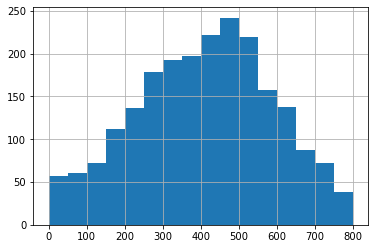

In [24]:
smart_users['c_duration'].hist(bins=range(0, 850, 50)) # Диаграмма 

По диаграмме видно скошенность данных влево. Или отрицательную скошенность. Само распределение нормальное.

In [25]:
print('Среднее количество минут в месяц:', smart_users['c_duration'].mean())

Среднее количество минут в месяц: 417.9349484073576


In [26]:
variance_c = np.var(smart_users['c_duration']) # Дисперсия
std_dev_c = np.sqrt(variance_c) # Стандартное отклонение
print('Дисперсия равна', variance_c)
print('Стандартное отклонение равно', std_dev_c)

Дисперсия равна 36203.066652094654
Стандартное отклонение равно 190.27103471651867


In [27]:
df_full.pivot_table(index = 'tariff', values = 'c_duration', aggfunc = ['mean', 'var', 'std'])

,mean,var,std
,c_duration,c_duration,c_duration
tariff,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


Получаем, что статистически, при среднем в 396 минут и стандартном отклонении в 179 минут, что 750 минут хватит в месяц практически всем пользователям.

#### Сообщения

<AxesSubplot:>

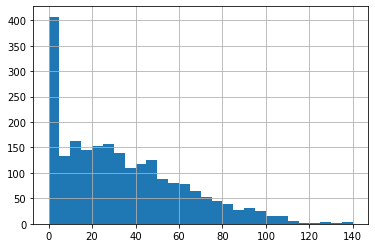

In [28]:
smart_users['m_count'].hist(bins=range(0, 145, 5)) #Диаграмма

Получили сильную скошенность графика вправо из-за количества значений. 

In [29]:
print('Среднее количество сообщений в месяц:', smart_users['m_count'].mean())

Среднее количество сообщений в месяц: 33.384028712427096


In [30]:
variance_m = np.var(smart_users['m_count']) # Дисперсия
std_dev_m = np.sqrt(variance_m) # Стандартное отклонение
print('Дисперсия равна', variance_m)
print('Стандартное отклонение равно', std_dev_m)

Дисперсия равна 796.455482917076
Стандартное отклонение равно 28.221542886898938


Вероятно, смс не самая популярная услуга, особенно при развитии мессенджеров. Большинство пользователей тарифа не израсходуют лимит в 100 сообщений.

#### Интернет

<AxesSubplot:>

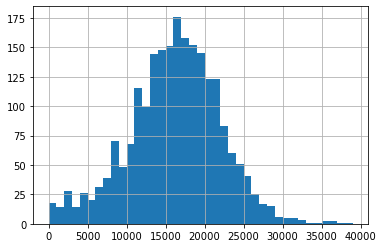

In [31]:
smart_users['mb_used'].hist(bins=range(0, 40000, 1000)) #Диаграмма

Также распределение вполне нормальное и немного скошено влево.

In [32]:
print('Среднее количество траффика в месяц:', smart_users['mb_used'].mean())

Среднее количество траффика в месяц: 16208.38698968148


In [33]:
variance_mb = np.var(smart_users['mb_used']) # Дисперсия
std_dev_mb = np.sqrt(variance_mb) # Стандартное отклонение
print('Дисперсия равна', variance_mb)
print('Стандартное отклонение равно', std_dev_mb)

Дисперсия равна 34447035.4952849
Стандартное отклонение равно 5869.159692433398


Получаем использование в месяц около 16Гб. Неплохо. При этом большинство закроют свои потребности 30Гб траффика.   

Итого пользователи тарифа в среднем в месяц тратят:   

|| Тратят в месяц | Включено в тариф |   
| --- | --- | --- |   
| Минуты | 396 | 500 |   
| СМС | 39 | 50 |   
| Траффик, Гб | 16 | 15 |   

Интересно, что в среднем пользователи вполне себе в рамках включенных лимитов тарифа, лишь немного доплачивая за трафиик. Т.е. средний пользователь тарифа приносит оператору в месяц лишь абонентсую плату - 550 руб.

Дисперсия равна 669485.2209234155


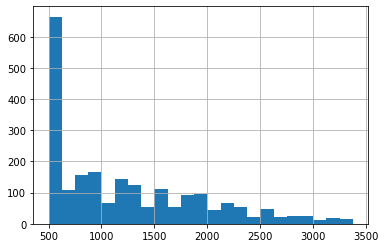

In [34]:
smart_users['month_rev'].hist(bins=range(500, 3500, 125)) #Диаграмма по тратам
print('Дисперсия равна', np.var(smart_users['month_rev']))

По затратам же видно, что действительно большое число клиентов укладываются в тарифные лимиты, но еще столько же сильно переплачивают за перерасход.

### Тариф Ultra
#### Минуты

<AxesSubplot:>

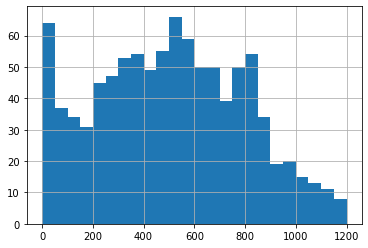

In [35]:
ultra_users['c_duration'].hist(bins=range(0, 1250, 50))

Наблюдаю скос вправо при близком к нормальному распределении.

In [36]:
print('Среднее количество минут в месяц:', ultra_users['c_duration'].mean())

Среднее количество минут в месяц: 526.6233502538071


In [37]:
variance_c_u = np.var(ultra_users['c_duration']) # Дисперсия
std_dev_c_u = np.sqrt(variance_c_u) # Стандартное отклонение
print('Дисперсия равна', variance_c_u)
print('Стандартное отклонение равно', std_dev_c_u)

Дисперсия равна 100771.22361720214
Стандартное отклонение равно 317.4448355497411


При среднем в 517 минут и отклонении в 288, тарифного лимита должно большинству хватать.

#### Сообщения

<AxesSubplot:>

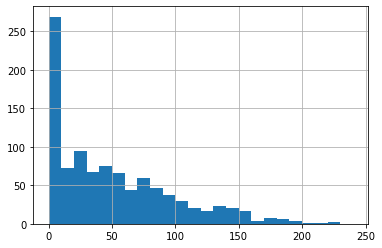

In [38]:
ultra_users['m_count'].hist(bins=range(0, 250, 10))

Распределение больше похоже на Пуассоновское.

In [39]:
print('Среднее количество сообщений в месяц:', ultra_users['m_count'].mean())

Среднее количество сообщений в месяц: 49.36345177664975


In [40]:
variance_m_u = np.var(ultra_users['m_count']) # Дисперсия
std_dev_m_u = np.sqrt(variance_m_u) # Стандартное отклонение
print('Дисперсия равна', variance_m_u)
print('Стандартное отклонение равно', std_dev_m_u)

Дисперсия равна 2282.946075394892
Стандартное отклонение равно 47.780184966101714


#### Интернет

<AxesSubplot:>

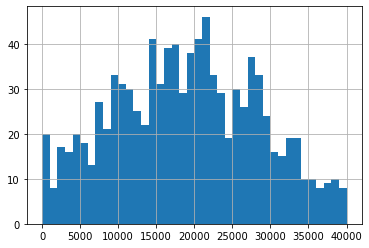

In [41]:
ultra_users['mb_used'].hist(bins=range(0, 40500, 1000))

Небольшой скос вправо.

In [42]:
print('Среднее количество траффика в месяц:', ultra_users['mb_used'].mean())

Среднее количество траффика в месяц: 19468.805208121845


In [43]:
variance_mb_u = np.var(ultra_users['mb_used']) # Дисперсия
std_dev_mb_u = np.sqrt(variance_mb_u) # Стандартное отклонение
print('Дисперсия равна', variance_mb_u)
print('Стандартное отклонение равно', std_dev_mb_u)

Дисперсия равна 101647713.26174632
Стандартное отклонение равно 10082.049060669478


Про траффик можно сказать, что потребности большинстрва закроет пакет из 40Гб.   

Итого пользователи тарифа в среднем в месяц тратят:   

|| Тратят в месяц | Включено в тариф |   
| --- | --- | --- |   
| Минуты | 517 | 3000 |   
| СМС | 61 | 1000 |   
| Траффик, Гб | 20 | 30 |   

Дисперсия равна 141373.07325620216


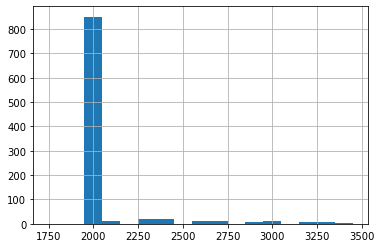

In [44]:
ultra_users['month_rev'].hist(bins=range(1750, 3500, 100)) #Диаграмма по тратам
print('Дисперсия равна', np.var(ultra_users['month_rev']))

Картина по тратам ожидаемая, практически все укладываются в тарифные лимиты.

## Проверка гипотез
Гипотезы звучат следующим образом:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Начну с первой. Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются, тогда альтернативной будет гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.   
Проверю.

In [45]:
results = st.ttest_ind(smart_users['month_rev'], ultra_users['month_rev'], equal_var=False)
alpha = .05
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Проверим вторую. Для этого для каждой выборки выделим еще клиентов из Москвы и остальных.

In [46]:
moscow_users = df_full.query('city == "Москва"')
print('Дисперсия равна', np.var(moscow_users['month_rev']))
other_users = df_full.query('city != "Москва"')
print('Дисперсия равна', np.var(other_users['month_rev']))

Дисперсия равна 564710.7117467293
Дисперсия равна 653886.3270894091


Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Альтернативная - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [47]:
results = st.ttest_ind(moscow_users['month_rev'], other_users['month_rev'])
alpha = .05
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

**Подготовка данных. Что было сделано**   
Были объединены 4 датасета с целью получения единого и удобного для анализа. Конкретнее: получен датасет с данными по трат в разрезе клиент/месяц.   
Из таблицы со звонками были удалены пропущенные звонки (звонки с нулевой продолжительностью).   
Данные были получены полными, без значимых пропусков.   

**Анализ действий пользователей**   
Пользователям тарифа Smart в большом ряде случаев не хватает включенных в тариф лимитов, они часто платят дополнительно к абонентской плате за перерасход лимитов.   
Пользователи же тарифа Ultra зачастую укладываются в лимиты и платят только абонентскую плату.

**Гипотезы**   
Гипотеза про разницу в выручке была отвергнута. Поэтому рекрмендация вкладываться в рекламу тарифа Ultra по логике, что пользователи Ultra гарантированно платят абонентскую плату, но при этом совсем не всегда по услугам даже подходят к лимиту. Т.е. оказано услуг менее заявленных, но гарантированно полученная прибыль +меньше возможный отток клиентов к другим операторам на предположительно более выгодные тарифы.   
Вторую же гипотезу не удалось отвергнуть.